<a href="https://colab.research.google.com/github/guddy2005/fli_delay_app/blob/main/finalflightdelayprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

imorting file


In [8]:
import pandas as pd

df2 = pd.read_csv('/content/airports.csv')
df3 = pd.read_csv('/content/flights.csv')

# Combine the DataFrames horizontally
combined_df = pd.concat([df2, df3], axis=1)

# Print some info
print(combined_df.head())

<ipython-input-8-bf01155edc50>:4: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv('/content/flights.csv')


  IATA_CODE                              AIRPORT         CITY STATE COUNTRY  \
0       ABE  Lehigh Valley International Airport    Allentown    PA     USA   
1       ABI             Abilene Regional Airport      Abilene    TX     USA   
2       ABQ    Albuquerque International Sunport  Albuquerque    NM     USA   
3       ABR            Aberdeen Regional Airport     Aberdeen    SD     USA   
4       ABY   Southwest Georgia Regional Airport       Albany    GA     USA   

   LATITUDE  LONGITUDE  YEAR  MONTH  DAY  ...  ARRIVAL_TIME ARRIVAL_DELAY  \
0  40.65236  -75.44040  2015      1    1  ...         408.0         -22.0   
1  32.41132  -99.68190  2015      1    1  ...         741.0          -9.0   
2  35.04022 -106.60919  2015      1    1  ...         811.0           5.0   
3  45.44906  -98.42183  2015      1    1  ...         756.0          -9.0   
4  31.53552  -84.19447  2015      1    1  ...         259.0         -21.0   

   DIVERTED CANCELLED CANCELLATION_REASON AIR_SYSTEM_DELAY  SE

In [9]:
combined_df.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,YEAR,MONTH,DAY,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040,2015,1,1,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190,2015,1,1,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919,2015,1,1,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183,2015,1,1,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447,2015,1,1,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 38 columns):
 #   Column               Dtype  
---  ------               -----  
 0   IATA_CODE            object 
 1   AIRPORT              object 
 2   CITY                 object 
 3   STATE                object 
 4   COUNTRY              object 
 5   LATITUDE             float64
 6   LONGITUDE            float64
 7   YEAR                 int64  
 8   MONTH                int64  
 9   DAY                  int64  
 10  DAY_OF_WEEK          int64  
 11  AIRLINE              object 
 12  FLIGHT_NUMBER        int64  
 13  TAIL_NUMBER          object 
 14  ORIGIN_AIRPORT       object 
 15  DESTINATION_AIRPORT  object 
 16  SCHEDULED_DEPARTURE  int64  
 17  DEPARTURE_TIME       float64
 18  DEPARTURE_DELAY      float64
 19  TAXI_OUT             float64
 20  WHEELS_OFF           float64
 21  SCHEDULED_TIME       float64
 22  ELAPSED_TIME         float64
 23  AIR_TIME             float64
 24

handling missing value


In [11]:
combined_df.isnull().sum()

,0
IATA_CODE,5818757
AIRPORT,5818757
CITY,5818757
STATE,5818757
COUNTRY,5818757
LATITUDE,5818760
LONGITUDE,5818760
YEAR,0
MONTH,0
DAY,0


In [12]:
import pandas as pd

df2 = pd.read_csv('/content/airports.csv')
df3 = pd.read_csv('/content/flights.csv')

# Combine the DataFrames horizontally
combined_df = pd.concat([df2, df3], axis=1)

# Handling missing values
# For columns with a large number of missing values, we might drop them
columns_to_drop = ['CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
combined_df = combined_df.drop(columns=columns_to_drop)

# For other columns, we can impute missing values based on the data type and context:

# Impute numerical columns with the mean or median
numerical_columns = ['LATITUDE', 'LONGITUDE', 'YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK',
                    'FLIGHT_NUMBER', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
                    'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
                    'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY']
for col in numerical_columns:
    combined_df[col] = combined_df[col].fillna(combined_df[col].median())  # Using median to avoid outliers

# Impute categorical columns with the most frequent value or a placeholder
categorical_columns = ['IATA_CODE', 'AIRPORT', 'CITY', 'STATE', 'COUNTRY', 'AIRLINE', 'TAIL_NUMBER',
                      'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']
for col in categorical_columns:
    combined_df[col] = combined_df[col].fillna(combined_df[col].mode()[0])  # Using mode for categorical data



# Print some info to check for missing values
print(combined_df.isnull().sum())

<ipython-input-12-96365c0be5a3>:4: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv('/content/flights.csv')


IATA_CODE              0
AIRPORT                0
CITY                   0
STATE                  0
COUNTRY                0
LATITUDE               0
LONGITUDE              0
YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
dtype: int64


In [13]:
combined_df.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,YEAR,MONTH,DAY,...,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040,2015,1,1,...,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190,2015,1,1,...,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919,2015,1,1,...,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183,2015,1,1,...,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447,2015,1,1,...,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0


In [14]:
combined_df['DATETIME_STR'] = combined_df['YEAR'].astype(str) + '-' + \
                               combined_df['MONTH'].astype(str) + '-' + \
                               combined_df['DAY'].astype(str) + ' ' + \
                               combined_df['DEPARTURE_TIME'].astype(str)

In [15]:
combined_df['DATETIME'] = pd.to_datetime(combined_df['DATETIME_STR'], format='%Y-%m-%d %H%M', errors='coerce')

In [16]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Select the numerical columns to scale
numerical_columns = ['LATITUDE', 'LONGITUDE', 'YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK',
                    'FLIGHT_NUMBER', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
                    'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
                    'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY']

# Fit the scaler to the data and transform it
combined_df[numerical_columns] = scaler.fit_transform(combined_df[numerical_columns])

In [18]:
import numpy as np

# Define bins for time of day
bins = [0, 600, 1200, 1800, 2400]  # 0-6am, 6am-12pm, 12pm-6pm, 6pm-12am
labels = ['Night', 'Morning', 'Afternoon', 'Evening']

# Create a new column 'TIME_OF_DAY'
combined_df['TIME_OF_DAY'] = pd.cut(combined_df['DEPARTURE_TIME'], bins=bins, labels=labels, include_lowest=True)

In [17]:
combined_df['FLIGHT_DURATION'] = combined_df['ARRIVAL_TIME'] - combined_df['DEPARTURE_TIME']

In [19]:
combined_df['SCHEDULED_DELAY'] = combined_df['SCHEDULED_ARRIVAL'] - combined_df['SCHEDULED_TIME']
combined_df['ACTUAL_DELAY'] = combined_df['ARRIVAL_TIME'] - combined_df['SCHEDULED_ARRIVAL']

analying data

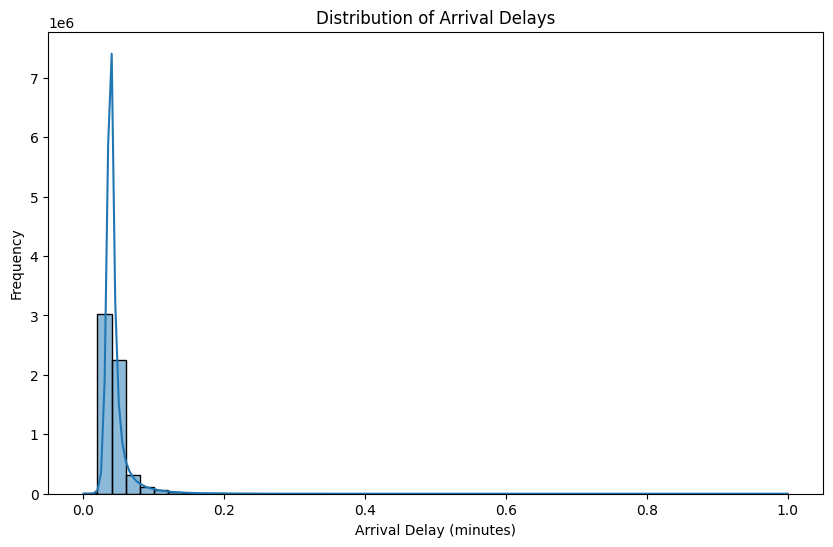

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(combined_df['ARRIVAL_DELAY'], bins=50, kde=True)
plt.title('Distribution of Arrival Delays')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Frequency')
plt.show()

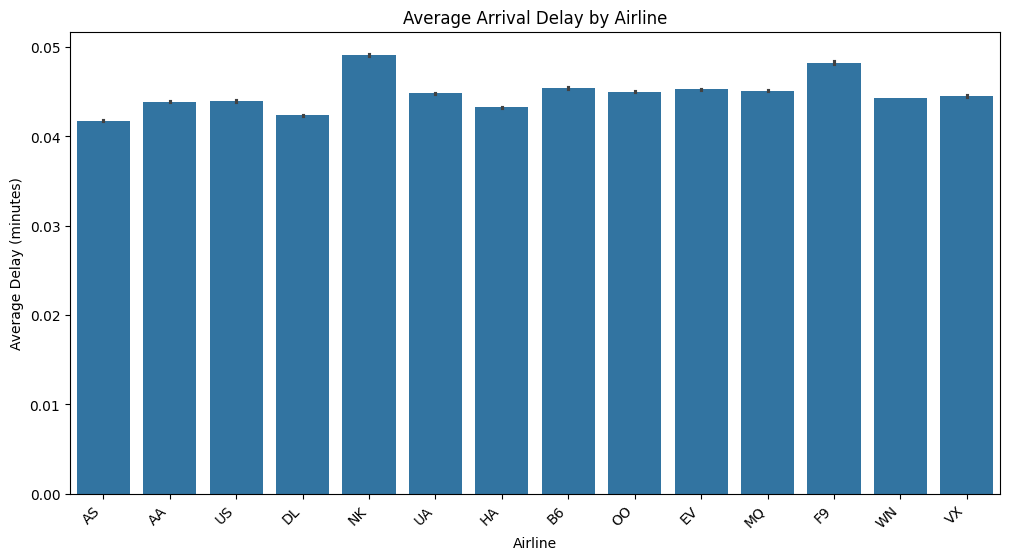

In [21]:
plt.figure(figsize=(12, 6))
sns.barplot(x='AIRLINE', y='ARRIVAL_DELAY', data=combined_df)
plt.title('Average Arrival Delay by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45, ha='right')
plt.show()

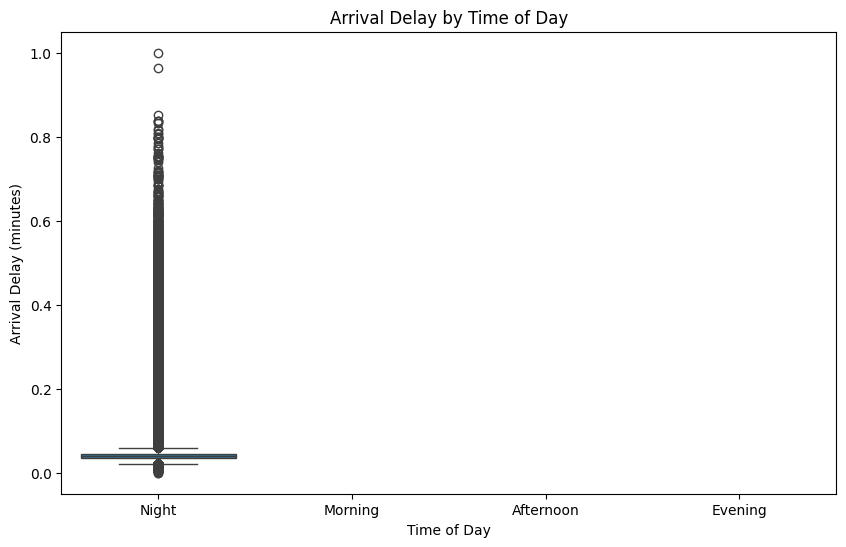

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='TIME_OF_DAY', y='ARRIVAL_DELAY', data=combined_df)
plt.title('Arrival Delay by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Arrival Delay (minutes)')
plt.show()

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select only numerical features for correlation analysis
numerical_features = combined_df.select_dtypes(include=np.number).columns

# Calculate correlation matrix using only numerical features
correlation_matrix = combined_df[numerical_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

NameError: name 'combined_df' is not defined

In [ ]:
# Convert the 'ORIGIN_AIRPORT' column to strings before applying Label Encoding
combined_df['ORIGIN_AIRPORT'] = combined_df['ORIGIN_AIRPORT'].astype(str)

# Create a LabelEncoder object for ORIGIN_AIRPORT
label_encoder_origin = LabelEncoder()

# Fit and transform the ORIGIN_AIRPORT column
combined_df['ORIGIN_AIRPORT_ENCODED'] = label_encoder_origin.fit_transform(combined_df['ORIGIN_AIRPORT'])

# Now you can use the 'ORIGIN_AIRPORT_ENCODED' column in your prediction model

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert the 'DESTINATION_AIRPORT' column to strings before applying Label Encoding
combined_df['DESTINATION_AIRPORT'] = combined_df['DESTINATION_AIRPORT'].astype(str)

# Create a LabelEncoder object for DESTINATION_AIRPORT
label_encoder_dest = LabelEncoder()  # Use a new LabelEncoder for destination

# Fit and transform the DESTINATION_AIRPORT column
combined_df['DESTINATION_AIRPORT_ENCODED'] = label_encoder_dest.fit_transform(combined_df['DESTINATION_AIRPORT'])

# Now you can use the 'DESTINATION_AIRPORT_ENCODED' column in your prediction model

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder_airline = LabelEncoder()

# Fit the encoder to the 'AIRLINE' column and transform it
combined_df['AIRLINE_ENCODED'] = label_encoder_airline.fit_transform(combined_df['AIRLINE'])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

# Define your features and target variable
# Remove 'DATETIME' from features and extract relevant features from it
features = ['DEPARTURE_TIME', 'ORIGIN_AIRPORT_ENCODED', 'AIRLINE_ENCODED',
            'FLIGHT_NUMBER', 'DESTINATION_AIRPORT_ENCODED']
target = 'ARRIVAL_DELAY'

# Extract the features and target from your DataFrame
X = combined_df[features]
y = combined_df[target]

#  Extract features from the 'DATETIME' column if needed
# For example, to get hour and day of week:
combined_df['DATETIME_HOUR'] = combined_df['DATETIME'].dt.hour
combined_df['DATETIME_DAYOFWEEK'] = combined_df['DATETIME'].dt.dayofweek

# Add the new features to your feature list
features.extend(['DATETIME_HOUR', 'DATETIME_DAYOFWEEK'])

# Update X with the new features
X = combined_df[features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)


# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
print(importance_df)
# or
# sns.barplot(x='Importance', y='Feature', data=importance_df)
# plt.title('Feature Importance')
# plt.show()